#### Problem Statement

Banks need to analyze customer behavior to determine whether a customer is likely to stay or leave. By leveraging historical data and key independent variables, the bank aims to develop a **predictive model** that can assess the likelihood of customer churn.

The goal of this model is to predict whether a new customer will remain with the bank or leave. This will enable the bank to take proactive measures, such as offering personalized incentives, to retain high-risk customers and improve overall customer satisfaction.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [31]:
data = pd.read_csv('Data/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
data.shape

(10000, 14)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [34]:
# Eliminate unnecessary columns
data_cleaned = data.drop(columns=["RowNumber", "CustomerId", "Surname"])
data_cleaned.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [35]:
# Split the data into dependent and independent variables
X = data_cleaned.drop(columns=["Exited"])
y = data_cleaned["Exited"]
print(f"Independent Features (X) shape: {X.shape}")
print(f"Dependent Feature (y) shape: {y.shape}")

Independent Features (X) shape: (10000, 10)
Dependent Feature (y) shape: (10000,)


**Label Encoding** is a technique used to convert categorical (text) data into numerical values so that machine learning models can process it.
- Each unique category in a feature column is assigned a numerical label. Example Gender

**One-Hot Encoding** If the categorical data does not have an ordinal relationship. For example Country names, colors
- One-Hot Encoding creates binary columns for each category, avoiding misleading ordinal relationships.


In [36]:
# Label encoding Gender 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_gender = LabelEncoder()
X.iloc[:, 2] = labelencoder_gender.fit_transform(X.iloc[:,2])

In [37]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64
9996,516,France,1,35,10,57369.61,1,1,1,101699.77
9997,709,France,0,36,7,0.00,1,0,1,42085.58
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52


In [38]:
# One-hot encoding Geography
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('ohe', OneHotEncoder(drop='first'), [1])], remainder='passthrough') # [1] is the second column we are transforming
X = np.array(ct.fit_transform(X), dtype=str)

# X[:, 1:]
X


array([['0.0', '0.0', '619', ..., '1', '1', '101348.88'],
       ['0.0', '1.0', '608', ..., '0', '1', '112542.58'],
       ['0.0', '0.0', '502', ..., '1', '0', '113931.57'],
       ...,
       ['0.0', '0.0', '709', ..., '0', '1', '42085.58'],
       ['1.0', '0.0', '772', ..., '1', '0', '92888.52'],
       ['0.0', '0.0', '792', ..., '1', '0', '38190.78']], dtype='<U9')

In [39]:
# Split data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [40]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
X_train

array([[-0.5698444 ,  1.74309049,  0.16958176, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [ 1.75486502, -0.57369368, -2.30455945, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-0.5698444 , -0.57369368, -1.19119591, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [-0.5698444 , -0.57369368,  0.9015152 , ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.5698444 ,  1.74309049, -0.62420521, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [ 1.75486502, -0.57369368, -0.28401079, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [42]:
X_test

array([[ 1.75486502, -0.57369368, -0.55204276, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-0.5698444 , -0.57369368, -1.31490297, ...,  0.64259497,
        -1.03227043,  0.49587037],
       [-0.5698444 ,  1.74309049,  0.57162971, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-0.5698444 ,  1.74309049, -0.74791227, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [ 1.75486502, -0.57369368, -0.00566991, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [ 1.75486502, -0.57369368, -0.79945688, ...,  0.64259497,
        -1.03227043,  1.61255917]])

In [43]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.569844,1.743090,0.169582,-1.091687,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,1.106432
1,1.754865,-0.573694,-2.304559,0.916013,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.748664
2,-0.569844,-0.573694,-1.191196,-1.091687,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,1.485335
3,-0.569844,1.743090,0.035566,0.916013,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,1.276528
4,-0.569844,1.743090,2.056114,-1.091687,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,0.558378
...,...,...,...,...,...,...,...,...,...,...,...
7995,1.754865,-0.573694,-0.582970,-1.091687,-0.656016,-0.339364,0.703104,0.809503,0.642595,0.968738,1.091330
7996,-0.569844,1.743090,1.478815,-1.091687,-1.613058,-0.339364,0.613060,-0.921591,0.642595,0.968738,0.131760
7997,-0.569844,-0.573694,0.901515,0.916013,-0.368904,0.006661,1.361474,0.809503,0.642595,-1.032270,1.412320
7998,-0.569844,1.743090,-0.624205,-1.091687,-0.081791,1.390762,-1.215717,0.809503,0.642595,0.968738,0.844321


In [44]:
# Building Neural Network
from keras.models import Sequential # near stack of layers, meaning we build the network layer by layer in sequence.
from keras.layers import Dense # This is a fully connected (FC) layer, meaning each neuron is connected to all neurons in the previous and next layers.
classifier = Sequential()

classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim = 11))
# units = 6 ->> no. of neurons
# kernel_initializer = 'uniform' ->> initializes the weights randomly with uniform distribution (all values between -0.05 and 0.05)
# input_dim = 11 ->> defines the number of input features

In [45]:
# Adding the next hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

In [46]:
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [47]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics =['accuracy'])

In [50]:
print(X_train.shape) 

(8000, 11)


In [49]:
# Feed dataset to our model
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
800/800 [==============================] - 5s 4ms/step - loss: 0.4816 - accuracy: 0.7949
Epoch 2/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4281 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4229 - accuracy: 0.7960
Epoch 4/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4193 - accuracy: 0.8210
Epoch 5/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4164 - accuracy: 0.8264
Epoch 6/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4141 - accuracy: 0.8289
Epoch 7/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4133 - accuracy: 0.8304
Epoch 8/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4115 - accuracy: 0.8306
Epoch 9/100
800/800 [==============================] - 4s 6ms/step - loss: 0.4105 - accuracy: 0.8332
Epoch 10/100
800/800 [==============================] - 5s 6ms/step - loss: 0.4101 - accura

The neural network was trained for 100 epochs, and the training output provides two key metrics per epoch:

- Loss (loss) – Measures how well the model is fitting the data (lower is better).
- Accuracy (accuracy) – Measures the proportion of correct predictions (higher is better).

**Key Observations**
- 1️⃣ Accuracy is Improving
    - Epoch 1: Accuracy starts at 79.49%.
    - Epoch 5: Accuracy increases to 82.64%.
    - Epoch 10: Accuracy reaches 83.42%.
    - Epoch 50: Accuracy improves to 85.72%.
    - Epoch 100: Accuracy stabilizes around 86.30%.
- ✅ The accuracy is steadily improving, which indicates that the model is learning from the data.

- 2️⃣ Loss is Decreasing
    - Epoch 1: Loss starts at 0.4816.
    - Epoch 5: Loss reduces to 0.4164.
    - Epoch 10: Loss is 0.4101.
    - Epoch 50: Loss decreases to 0.3501.
    - Epoch 100: Loss settles around 0.3423.
- ✅ The loss is consistently decreasing, which means the model is minimizing errors over time.

- 3️⃣ Accuracy Plateaus Around 86%
After epoch 80-100, accuracy stabilizes around 86%, meaning the model may have learned as much as it can from the dataset.
Further training might not improve accuracy significantly, and overfitting could become a risk.

**What Can We Make of This?**
- The model is learning well – Accuracy improved from 79% → 86%, and loss reduced.
- Training is effective – Loss steadily decreases, meaning the model is getting better at minimizing errors.
- Potential Overfitting Risk – Accuracy is plateauing; testing the model on validation/test data is necessary.

In [51]:
# check model generalization
test_loss, test_accuracy = classifier.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy: .4f}")

63/63 [==============================] - 1s 3ms/step - loss: 0.3404 - accuracy: 0.8570
Test accuracy:  0.8570


Epoch 1/100
800/800 [==============================] - 3s 3ms/step - loss: 0.3427 - accuracy: 0.8625 - val_loss: 0.3489 - val_accuracy: 0.8530
Epoch 2/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3425 - accuracy: 0.8630 - val_loss: 0.3380 - val_accuracy: 0.8605
Epoch 3/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3426 - accuracy: 0.8618 - val_loss: 0.3393 - val_accuracy: 0.8615
Epoch 4/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3418 - accuracy: 0.8608 - val_loss: 0.3422 - val_accuracy: 0.8575
Epoch 5/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3414 - accuracy: 0.8614 - val_loss: 0.3413 - val_accuracy: 0.8565
Epoch 6/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3415 - accuracy: 0.8602 - val_loss: 0.3447 - val_accuracy: 0.8555
Epoch 7/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3417 - accuracy: 0.8621 - val_loss: 0.3420 - val_accuracy: 0.8655

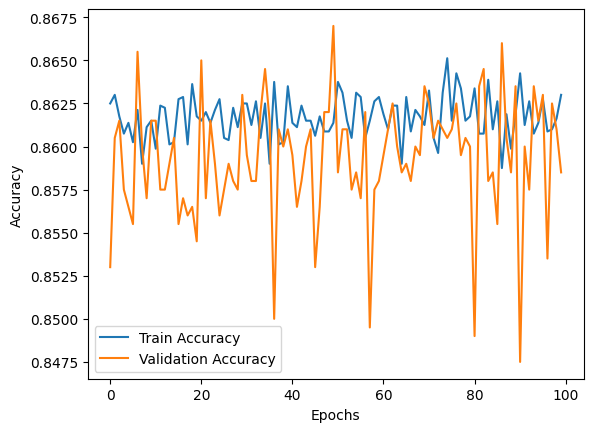

In [52]:
# plot accuracy and loss curves
history = classifier.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=10, verbose=1)

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [53]:
# Predict test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)
print(y_pred)

63/63 [==============================] - 0s 2ms/step
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm


array([[1502,   93],
       [ 190,  215]])

1502 True Negatives, 93 False Positives, 190 False Negatives, 215 True positives

- 1502 (TN): Correctly predicted customers who stayed.
- 215 (TP): Correctly predicted customers who left.
- 93 (FP, Type I Error): Model wrongly predicted they would leave, but they actually stayed.
- 190 (FN, Type II Error): Model missed predicting customers who actually left.

In [56]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8585


In [57]:
# precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")


Precision: 0.6981


In [58]:
# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")


Recall: 0.5309


In [59]:
# F1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")


F1-Score: 0.6031


- Accuracy (85.85%) is good but could be misleading due to class imbalance (fewer churners).
- Low Recall (53.09%) means the model misses many churners → Not great for churn prediction!
- Precision (69.87%) is moderate, meaning it makes some incorrect churn predictions.